In [ ]:
# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'/Users/pedropaulo/Desktop/Tasks CF/New York Citi Bikes Project/Data/citibike.csv')

In [38]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,gender,start_year,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,2,2013,9,37,9,2013,9,37,9,18
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,1,2013,9,37,12,2013,9,37,12,18
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,1,2013,9,38,18,2013,9,38,18,19
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,2,2013,9,39,28,2013,9,39,28,12
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,0,2013,9,36,7,2013,9,36,7,18


In [ ]:
# Checking missing values and duplicates

In [6]:
df.isnull().sum()

trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
dtype: int64

In [ ]:
# Replacing birth_year missing values by 0

In [5]:
df['birth_year'].fillna(0, inplace = True)

In [7]:
df_dups = df[df.duplicated()]

In [8]:
df_dups

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender


no duplicates was found

In [ ]:
# Preparing variables for analysis 

In [27]:
df['trip_duration'] = df.start_time.apply(lambda x: x.minute)

In [13]:
df.start_time = pd.to_datetime(df.start_time, format='%Y-%m-%d %H:%M:%S')
df['start_year'] = df.start_time.apply(lambda x: x.year)
df['start_month'] = df.start_time.apply(lambda x: x.month)
df['start_week'] = df.start_time.apply(lambda x: x.week)
df['start_day'] = df.start_time.apply(lambda x: x.day)
df['start_hour'] = df.start_time.apply(lambda x: x.hour)

In [14]:
df.end_time = pd.to_datetime(df.end_time, format='%Y-%m-%d %H:%M:%S')
df['end_year'] = df.start_time.apply(lambda x: x.year)
df['end_month'] = df.end_time.apply(lambda x: x.month)
df['end_week'] = df.end_time.apply(lambda x: x.week)
df['end_day'] = df.end_time.apply(lambda x: x.day)
df['end_hour'] = df.end_time.apply(lambda x: x.hour)

In [28]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,gender,start_year,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,2,2013,9,37,9,2013,9,37,9,18
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,1,2013,9,37,12,2013,9,37,12,18
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,1,2013,9,38,18,2013,9,38,18,19
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,2,2013,9,39,28,2013,9,39,28,12
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,0,2013,9,36,7,2013,9,36,7,18


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  50000 non-null  object        
 1   bike_id                  50000 non-null  int64         
 2   weekday                  50000 non-null  object        
 3   start_hour               50000 non-null  int64         
 4   start_time               50000 non-null  datetime64[ns]
 5   start_station_id         50000 non-null  int64         
 6   start_station_name       50000 non-null  object        
 7   start_station_latitude   50000 non-null  float64       
 8   start_station_longitude  50000 non-null  float64       
 9   end_time                 50000 non-null  datetime64[ns]
 10  end_station_id           50000 non-null  int64         
 11  end_station_name         50000 non-null  object        
 12  end_station_latitude     50000 n

In [ ]:
# Analyzing variables with possible correlations 

<Axes: >

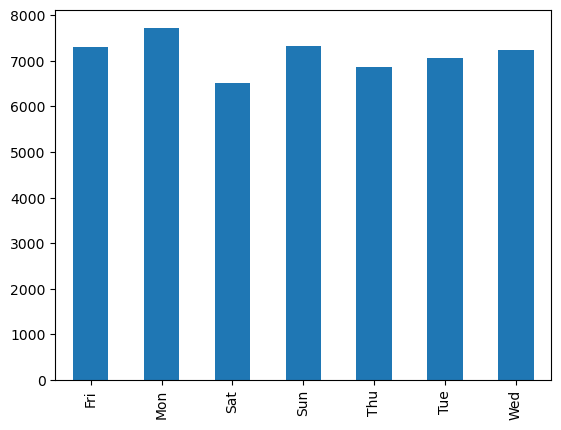

In [12]:
df['weekday'].value_counts().sort_index().plot.bar()

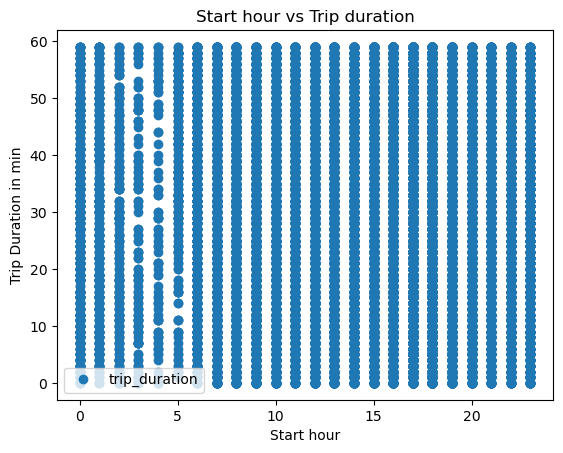

In [41]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Start hour vs Trip duration')  
plt.xlabel('Start hour')  
plt.ylabel('Trip Duration in min')  
plt.show()

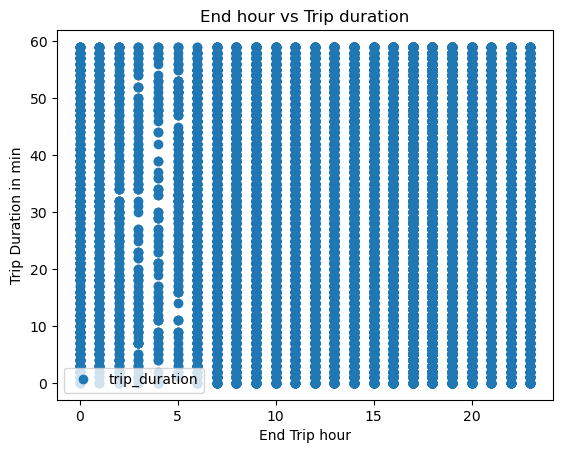

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'end_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('End hour vs Trip duration')  
plt.xlabel('End Trip hour')  
plt.ylabel('Trip Duration in min')  
plt.show()

When evaluating the scatterplot, we see a pattern in activity, i.e. between 0 and 5 am, the activity time is lower and most trips last max 1 hour.

# Hypothesis to be tested: The later the travel time, the shorter the duration of the trips.

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['start_hour'].values.reshape(-1,1)
y = df['trip_duration'].values.reshape(-1,1)

In [44]:
X

array([[18],
       [18],
       [19],
       ...,
       [18],
       [13],
       [21]])

In [45]:
y

array([[18],
       [38],
       [44],
       ...,
       [ 8],
       [25],
       [54]])

In [46]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [47]:
# Create a regression object.

regression = LinearRegression()

In [48]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

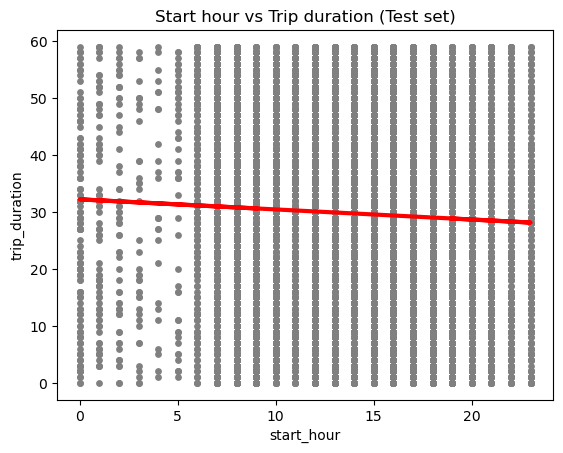

In [50]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Start hour vs Trip duration (Test set)')
plot_test.xlabel('start_hour')
plot_test.ylabel('trip_duration')
plot_test.show()

In [51]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [52]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.17714097]]
Mean squared error:  300.3824758249527
R2 score:  0.002734528511117551


Conclusions: The graph shows us that the trend is negative, that is, the later, the shorter the travel time, but we see that the MSE is quite high, showing a large distance, which means an inaccuracy, the R2 also shows us an extremely low correlation.

In [53]:
y_predicted

array([[28.84355557],
       [28.66641459],
       [28.84355557],
       ...,
       [28.84355557],
       [29.72926042],
       [30.61496528]])

In [54]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,44,28.843556
1,19,28.666415
2,3,28.843556
3,1,29.374978
4,19,32.209234
5,9,29.020697
6,17,30.792106
7,46,29.552119
8,3,29.374978
9,50,29.197838


# Compare how the regression fits the training set

In [55]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [56]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.17714097]]
Mean squared error:  297.7392168943358
R2 score:  0.002479598268203209


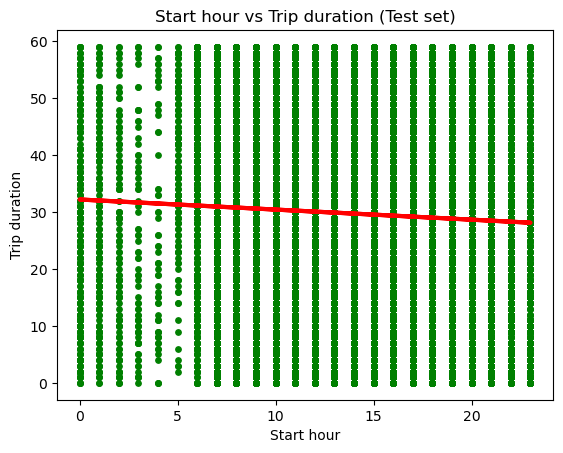

In [59]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Trip duration (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Trip duration')
plot_test.show()

The conclusions we draw from this regression analysis is that there is no direct correlation between time of day and trip duration, it would require other variables in the database that are not available to create a predictive model with more dimensionality.

In [60]:
df.to_pickle(r'/Users/pedropaulo/Desktop/Tasks CF/New York Citi Bikes Project/Data/citibike_cleaned.pkl')